## Hypothesis 3
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.

### Filter: HomeWYN=1 (i.e., only use people who use heaters when being at home in winter)


In [23]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeW==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","HomeSYN","AwayWNY","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","SqftCate","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN","Latitude",
    "Longitude", "Job","hot","cold","Ethnic"))];
sort(names(survey))

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"

In [24]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncHomeS" "12"      
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   


In [25]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))

[1] 662  83
[1] 640  83


In [26]:
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"BillS",
"NBillS",
"Sqft",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"MC1",
"MC2",
"MC3",
"MC4",
"MC5",
"Frugal1",
"Frugal2",
"Frugal3",
"Trust1",
"Trust2",
"Trust3",
"Trust4",
"ComfNS1",
"ComfNS2",
"ComfNS3",
"ConvB1",
"ConvB2",
"ConvB3",
"ConvB4",
"ControlN1",
"ControlN2R",
"ControlN3",
"ControlN4",
"Atti1",
"Atti2",
"Atti3",
"Atti4",
"SubNorm1",
"SubNorm2",
"SubNorm3",
"PBC1",
"PBC2",
"PBC3R",
"PBC4",
"PBC5",
"SN1",
"SN2",
"SN3",
"SN4",
"HabitC1",
"HabitC2",
"HabitC3",
"HabitC4",
"HabitC5",
"HabitC6",
"HabitC7",
"HabitE1",
"HabitE2",
"HabitE3")

In [27]:
data1 <- data[data$HomeWYN==1,c("IncHomeW",IVS)];

names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data2,.75)

[1] "IncHomeW"   "Age"        "Gender"     "OwnRent"    "BillS"     
 [6] "NBillS"     "Sqft"       "SqftCate"   "HouseholdS" "Political" 
[11] "Ethnic"     "Income"     "Educ"       "MC1"        "MC2"       
[16] "MC3"        "MC4"        "MC5"        "Frugal1"    "Frugal2"   
[21] "Frugal3"    "Trust1"     "Trust2"     "Trust3"     "Trust4"    
[26] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ConvB1"     "ConvB2"    
[31] "ConvB3"     "ConvB4"     "ControlN1"  "ControlN2R" "ControlN3" 
[36] "ControlN4"  "Atti1"      "Atti2"      "Atti3"      "Atti4"     
[41] "SubNorm1"   "SubNorm2"   "SubNorm3"   "PBC1"       "PBC2"      
[46] "PBC3R"      "PBC4"       "PBC5"       "SN1"        "SN2"       
[51] "SN3"        "SN4"        "HabitC1"    "HabitC2"    "HabitC3"   
[56] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
[61] "HabitE2"    "HabitE3"

[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "NBillS" "2"     
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   


In [28]:
data2 <- data1;
data2 <- na.omit(data2)

In [29]:
hiCor(data2,.75)

,BillS,NBillS,Sqft,SqftCate,MC1,MC2,Trust1,Trust3,Trust4,ComfNS1,ComfNS3,Atti1,Atti2,Atti3,Atti4,PBC2,PBC4,SN1,SN2
BillS,1.000,0.969,0.39683,0.3869,-0.048,-0.090,-0.1445,-0.15879,-0.137,0.317,0.26327,-0.0669,-0.0630,-0.0690,-0.0548,-0.087,-0.058,0.04344,0.0568
NBillS,0.969,1.000,0.38486,0.3752,-0.043,-0.089,-0.1428,-0.15010,-0.134,0.304,0.25280,-0.0695,-0.0694,-0.0717,-0.0502,-0.100,-0.078,0.05411,0.0655
Sqft,0.397,0.385,1.00000,0.9690,0.134,0.086,0.0116,-0.00013,0.033,0.045,0.01566,0.0244,-0.0013,0.0104,0.0014,-0.080,-0.051,0.11368,0.0946
SqftCate,0.387,0.375,0.96904,1.0000,0.130,0.071,0.0063,-0.00804,0.027,0.044,0.01152,0.0094,-0.0158,-0.0081,-0.0165,-0.069,-0.042,0.11445,0.1005
MC1,-0.048,-0.043,0.13362,0.1298,1.000,0.799,0.1438,0.08135,0.146,-0.050,-0.08531,0.1100,0.0732,0.0903,0.1172,0.072,0.091,0.06977,0.0597
MC2,-0.090,-0.089,0.08552,0.0714,0.799,1.000,0.1365,0.07931,0.134,-0.076,-0.07386,0.1080,0.0556,0.0727,0.1086,0.098,0.134,0.06369,0.0421
Trust1,-0.144,-0.143,0.01157,0.0063,0.144,0.137,1.0000,0.79375,0.913,-0.033,-0.06512,0.1290,0.1044,0.1418,0.1228,0.084,0.107,0.21051,0.2239
Trust3,-0.159,-0.150,-0.00013,-0.0080,0.081,0.079,0.7937,1.00000,0.780,-0.022,-0.04076,0.1276,0.1193,0.1309,0.1340,0.061,0.057,0.21472,0.2267
Trust4,-0.137,-0.134,0.03346,0.0266,0.146,0.134,0.9130,0.78008,1.000,-0.037,-0.07200,0.1258,0.1032,0.1376,0.1357,0.082,0.108,0.22157,0.2110
ComfNS1,0.317,0.304,0.04515,0.0435,-0.050,-0.076,-0.0327,-0.02221,-0.037,1.000,0.77360,-0.0813,-0.0713,-0.0465,-0.0683,0.023,0.016,-0.00402,0.0129


In [30]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:40];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:40){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
      MC5 Frugal1 Frugal3 ConvB1 Atti1 Atti2 Atti3 Atti4
PC1 -0.21   -0.21   -0.21   0.21 -0.25 -0.24 -0.24 -0.25
[1] 0.2
    OwnRent  Sqft SqftCate Income Trust1 Trust2 Trust3 Trust4   SN1   SN2   SN4
PC2   -0.21 -0.22    -0.25   -0.2  -0.24  -0.21  -0.25  -0.24 -0.26 -0.26 -0.22
[1] 0.26
    BillS NBillS SqftCate Trust1 Trust3 Trust4 ComfNS1 ComfNS2 ComfNS3
PC3  0.29   0.32     0.24  -0.21  -0.22   -0.2    0.27    0.26    0.25
[1] 0.3
    Trust1 Trust2 Trust3 Trust4 ComfNS1 ComfNS2 ComfNS3 PBC2 PBC4 PBC5
PC4   0.28   0.29   0.25   0.27    0.23    0.21    0.24 0.23 0.22 0.24
[1] 0.35
    OwnRent Income  MC1   MC2 ComfNS1 ComfNS2 ComfNS3  SN1  SN2 SN3  SN4
PC5   -0.22  -0.23 -0.3 -0.29    0.26    0.22    0.25 0.24 0.24 0.2 0.24
[1] 0.39
     MC1   MC2 ConvB2 ConvB3 ConvB4 ControlN4 HabitC1
PC6 -0.2 -0.24  -0.28  -0.33  -0.34     -0.22     0.2
[1] 0.43
    Frugal2 Trust2 Atti1 Atti2 Atti3 Atti4  SN1  SN2  SN4
PC7   -0.21  -0.21  -0.2  -0.2 -0.24 -0.23 0.25 0.25 0.23
[1] 0.46
  

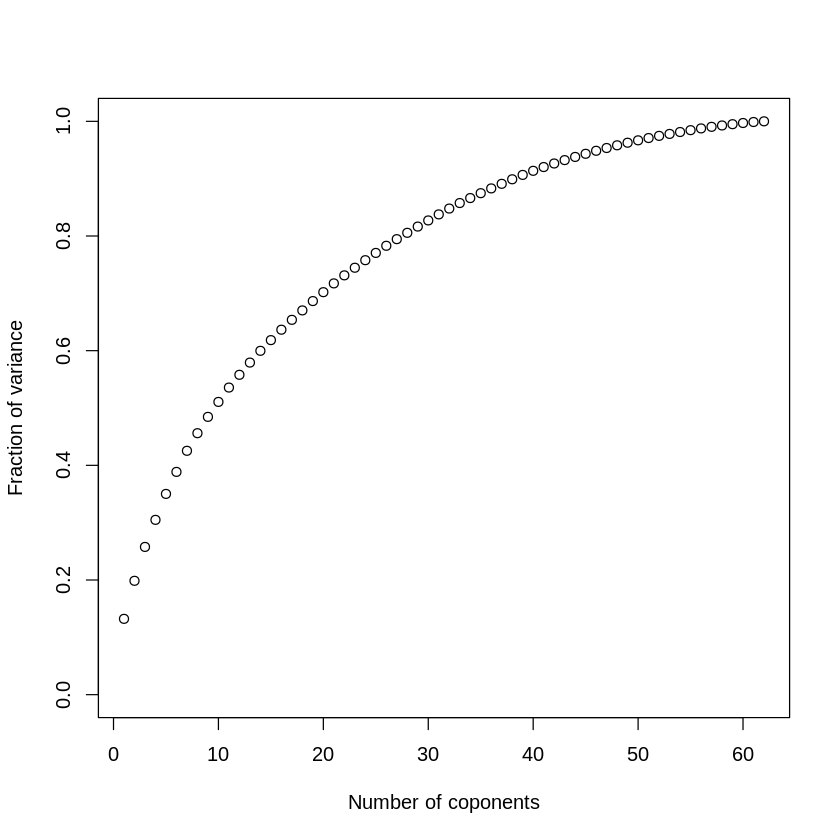

In [31]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [32]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [33]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,8,0.68
MC2,15,0.68
MC1,14,0.67
Trust2,23,0.65
ComfNS2,27,0.64
SN4,52,0.61
Sqft,7,0.59
Frugal2,20,0.59
SubNorm2,42,0.59
Frugal3,21,0.57
ConvB4,32,0.57


In [34]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [35]:
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));

In [36]:
table(data2[,"IncHomeW"])


  1   2   3   4   5   6   7   8  99 
 59  56 110 230  93  79  63  42   2 

In [37]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.52  -1.62  -0.34   1.20  90.40 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7.319442   3.586611    2.04    0.042 *
SqftCate    -0.278411   0.301173   -0.92    0.356  
MC2         -0.070450   0.217458   -0.32    0.746  
MC1          0.105625   0.205943    0.51    0.608  
Trust2      -0.227529   0.148951   -1.53    0.127  
ComfNS2      0.149327   0.118208    1.26    0.207  
SN4          0.234486   0.150860    1.55    0.121  
Sqft         0.000133   0.000291    0.46    0.648  
Frugal2     -0.028899   0.248236   -0.12    0.907  
SubNorm2    -0.477990   0.192520   -2.48    0.013 *
Frugal3      0.024684   0.259355    0.10    0.924  
ConvB4      -0.045921   0.165920   -0.28    0.782  
MC5          0.260575   0.250297    1.04    0.298  
Frugal1     -0.361080   0.315466   -1.14    0.253  
ConvB1       0.002401   0.216827    0.01    0.991  
ConvB2       0.351276   0.226

In [38]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
SqftCate,1,1.1e+01,11.41,0.413,0.521
MC2,1,4.9e-01,0.49,0.018,0.894
MC1,1,9.7e+00,9.67,0.350,0.554
Trust2,1,7.3e+01,73.01,2.645,0.104
ComfNS2,1,5.5e+01,55.07,1.995,0.158
SN4,1,4.7e+01,47.42,1.718,0.190
Sqft,1,4.0e-01,0.40,0.014,0.904
Frugal2,1,2.2e+01,21.85,0.792,0.374
SubNorm2,1,7.5e+01,74.62,2.703,0.101
Frugal3,1,3.9e+00,3.86,0.140,0.709


In [39]:
mod = lm(IncHomeW~ComfNS3+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeW ~ ComfNS3 + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.93  -1.47  -0.44   1.01  94.46 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.4614     0.7855    4.41  1.2e-05 ***
ComfNS3       0.1295     0.1067    1.21     0.23    
Age           0.0136     0.0173    0.78     0.43    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.3 on 731 degrees of freedom
Multiple R-squared:  0.00304,	Adjusted R-squared:  0.000315 
F-statistic: 1.12 on 2 and 731 DF,  p-value: 0.328


In [40]:
#Probably overfitting
mod1 = lm(IncHomeW~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeW ~ ComfNS3 + Age + HabitC2, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.06  -1.40  -0.43   0.97  94.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.9162     1.0076    2.89   0.0039 **
ComfNS3       0.1340     0.1068    1.25   0.2100   
Age           0.0136     0.0173    0.78   0.4331   
HabitC2       0.0928     0.1074    0.86   0.3877   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.3 on 730 degrees of freedom
Multiple R-squared:  0.00406,	Adjusted R-squared:  -3.09e-05 
F-statistic: 0.992 on 3 and 730 DF,  p-value: 0.396


In [41]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [42]:
mGam = gam(IncHomeW~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeW ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.784      0.266   17.96   <2e-16 ***
I(ComfNS3 <= 3)TRUE   -0.765      0.451   -1.69    0.091 .  
I(ComfNS3 == 7)TRUE   -0.125      0.528   -0.24    0.813    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value
s(Age)   1      1 0.66    0.42

R-sq.(adj) =  0.000962   Deviance explained = 0.505%
GCV = 27.883  Scale est. = 27.731    n = 734

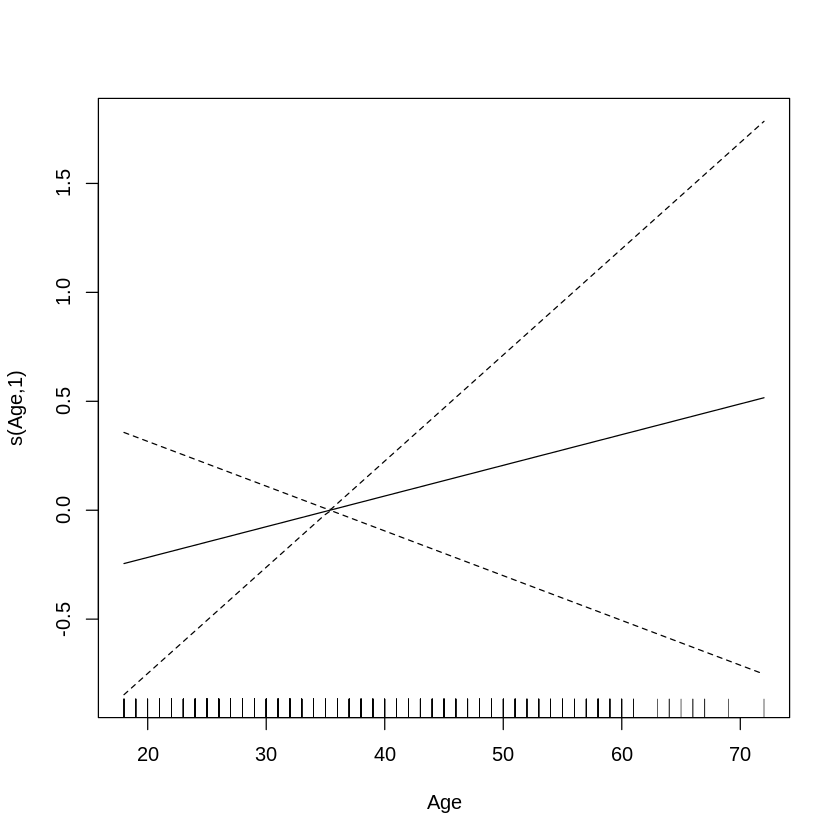

In [43]:
plot(mGam)

In [44]:
mod1 = lm(IncHomeW~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeW ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.40  -1.39  -0.47   1.04  94.32 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.0473     0.9864    4.10  4.5e-05 ***
I(ComfNS3 <= 3)TRUE  -0.8069     0.4534   -1.78    0.076 .  
I(ComfNS3 == 7)TRUE  -0.0803     0.5295   -0.15    0.879    
Age                   0.0139     0.0173    0.80    0.424    
HabitC2               0.0939     0.1075    0.87    0.383    
Political            -0.0655     0.0887   -0.74    0.460    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.3 on 728 degrees of freedom
Multiple R-squared:  0.00686,	Adjusted R-squared:  3.45e-05 
F-statistic: 1.01 on 5 and 728 DF,  p-value: 0.414


In [45]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,83.3,83.3,3.002,0.084
I(ComfNS3 == 7),1,1.1,1.1,0.039,0.844
Age,1,18.4,18.4,0.662,0.416
HabitC2,1,21.6,21.6,0.778,0.378
Political,1,15.1,15.1,0.545,0.460
Residuals,728,20206.6,27.8,NA,NA


In [46]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,20207,2445
I(ComfNS3 <= 3),1,87.90,20295,2447
I(ComfNS3 == 7),1,0.64,20207,2443
Age,1,17.75,20224,2444
HabitC2,1,21.17,20228,2444
Political,1,15.14,20222,2444


In [47]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



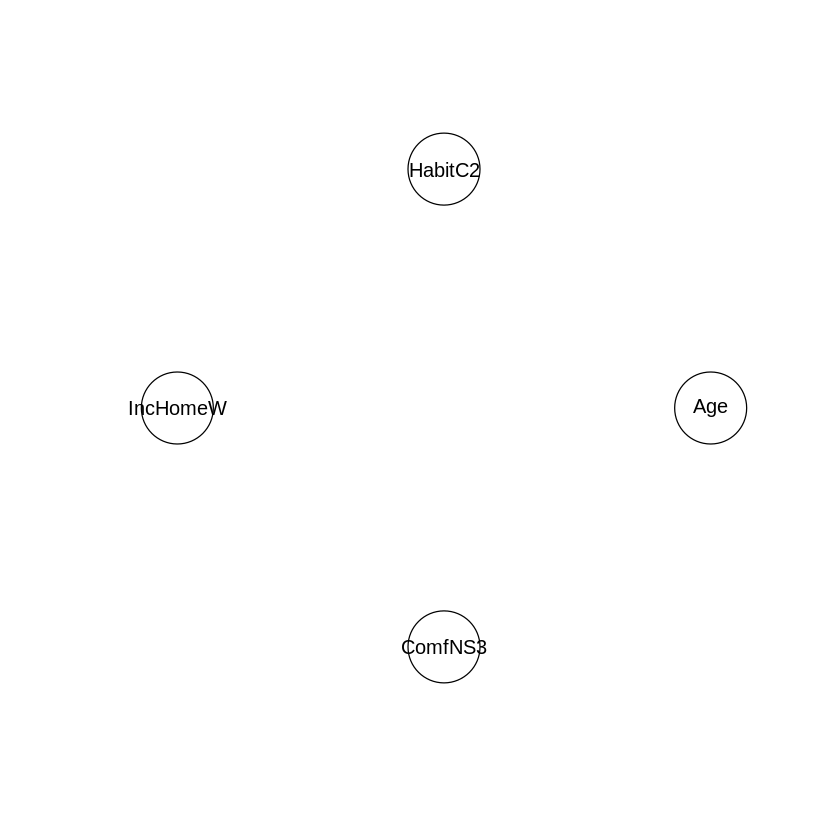

In [48]:
dd2 = data2[,c('IncHomeW', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [49]:
fmlaF <- as.formula(paste("IncHomeW",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.30  -1.67  -0.30   1.26  90.25 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7.074992   3.681837    1.92    0.055 .
Age          0.015623   0.020800    0.75    0.453  
Gender      -0.397773   0.441659   -0.90    0.368  
OwnRent      0.076587   0.492137    0.16    0.876  
BillS        0.008441   0.003684    2.29    0.022 *
NBillS      -0.452060   0.370421   -1.22    0.223  
Sqft         0.000128   0.000295    0.43    0.666  
SqftCate    -0.328670   0.309130   -1.06    0.288  
HouseholdS  -0.241035   0.197350   -1.22    0.222  
Political   -0.054114   0.097300   -0.56    0.578  
Ethnic       0.058761   0.173477    0.34    0.735  
Income      -0.176335   0.125571   -1.40    0.161  
Educ        -0.141339   0.199402   -0.71    0.479  
MC1          0.103921   0.209139    0.50    0.619  
MC2         -0.051174   0.222227   -0.23    0.818  
MC3          0.146658   0.19

In [50]:
#Probably overfitting
mod1 = lm(IncHomeW~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeW ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.43  -1.35  -0.40   0.99  94.58 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.6275     1.2537    2.89   0.0039 **
ComfNS3       0.1308     0.1079    1.21   0.2261   
Age           0.0145     0.0175    0.83   0.4053   
HabitC2       0.0953     0.1075    0.89   0.3757   
Political    -0.0589     0.0890   -0.66   0.5084   
Ethnic        0.1110     0.1617    0.69   0.4926   
Trust1       -0.1518     0.1268   -1.20   0.2317   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.3 on 727 degrees of freedom
Multiple R-squared:  0.00749,	Adjusted R-squared:  -0.0007 
F-statistic: 0.915 on 6 and 727 DF,  p-value: 0.484


In [51]:
for (i in 1:length(IVS)){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 1 in model.matrix: no columns are assigned"Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 1 in model.matrix: no columns are assigned"Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 2 in model.matrix: no columns are assigned"Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 3 in model.matrix: no columns are assigned"Warning message in model

ERROR: Error in -"Age": invalid argument to unary operator


In [21]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
dd2 = data2[,c('IncHomeW', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdW","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)